## Drawing PMF (probability mass function) for Binomial Trials
Calculating and Drawing probability values for various number of clicks (conversions) to draw Probability Distribution Function (PDF)


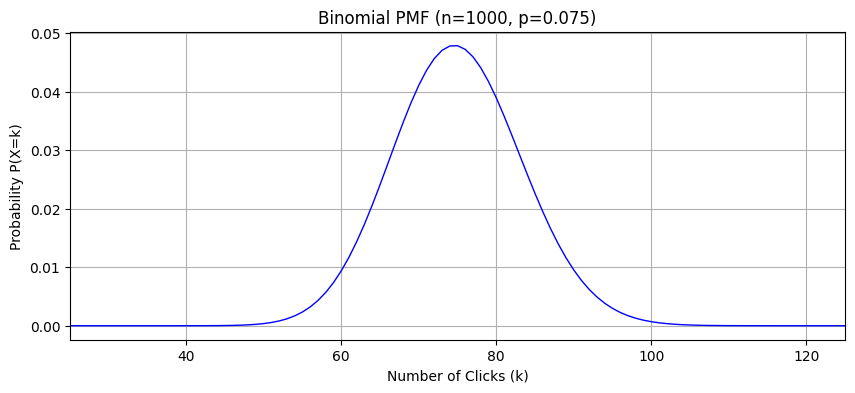

In [2]:
# In a campaign that was run, out of 1000 visitors, 75 of them clicked tha ad.
# Considering this as binomial trials, let's calculate the point estimates (probabilities) and then plot those points estimates to shwo
# the probability density function plot
import math
import matplotlib.pyplot as plt

# Observed data
N = 1000
observed_clicks = 75
p = observed_clicks / N  # Estimated click-through probability

# Compute binomial PMF
P = []
for k in range(0, N + 1):
    nck = math.comb(N, k)
    Pk = nck * (p ** k) * ((1 - p) ** (N - k))
    P.append(Pk)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(range(0, N + 1), P, color='blue', linewidth=1)
plt.title(f"Binomial PMF (n={N}, p={p:.3f})")
plt.xlabel("Number of Clicks (k)")
plt.ylabel("Probability P(X=k)")
plt.xlim(observed_clicks - 50, observed_clicks + 50)  # Zoom around the peak
plt.grid(True)
plt.show()


### ✅ Option 2: Compute Full Binomial PMF (Vectorized)

If you're ultimately computing the binomial PMF, then no need to compute combinations manually — use scipy.stats.binom.pmf which handles it all efficiently and safely:

In [3]:
import numpy as np
from scipy.stats import binom

n = 1000
p = 75 / 1000
k = np.arange(0, n + 1)

pmf = binom.pmf(k, n, p)


In [4]:
pmf

array([1.38590269e-34, 1.12370489e-32, 4.55100479e-31, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

🔍 Why scipy.stats.binom.pmf is Preferred
Uses log-gamma functions to compute log(C(n, k)) safely:

logC(n,k)=logΓ(n+1)−logΓ(k+1)−logΓ(n−k+1)


Then exponentiates to get the probability.
Avoids overflow from huge factorials or math.comb.